In [ ]:
import numpy as np

In [ ]:
from google.colab import drive;
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
txt_path='/content/drive/MyDrive/Point_cloud_data/bildstein_station1_xyz_intensity_rgb.txt'
pcd_np=np.loadtxt(txt_path,skiprows=1)

In [ ]:
pcd_np[0:5]

array([[   20.362,    40.375,    -2.239,  -941.   ,   130.   ,   141.   ,
          159.   ],
       [   20.36 ,    40.376,    -2.402, -1083.   ,   139.   ,   151.   ,
          165.   ],
       [   20.374,    40.367,    -2.405, -1122.   ,   131.   ,   147.   ,
          163.   ],
       [   20.372,    40.366,    -2.405, -1165.   ,   132.   ,   145.   ,
          161.   ],
       [   20.375,    40.364,    -2.404, -1036.   ,   133.   ,   149.   ,
          165.   ]])

In [ ]:
##Print the first point
print("First point of the data\n",pcd_np[0])

First point of the data
 [  20.362   40.375   -2.239 -941.     130.     141.     159.   ]


In [ ]:
##Print the thress columns X,Y,Z for all point
print('First columns X,Y,Z\n',pcd_np[:,0:3])

First columns X,Y,Z
 [[20.362 40.375 -2.239]
 [20.36  40.376 -2.402]
 [20.374 40.367 -2.405]
 ...
 [60.122 81.777 11.115]
 [60.088 81.818 11.054]
 [60.197 82.137 11.085]]


In [ ]:
##Print the last 3 columns (i,1 X,Y,Z for the first 4 points)
print('R,G,B information of the first four point \n',pcd_np[0:4,3:6])

R,G,B information of the first four point 
 [[ -941.   130.   141.]
 [-1083.   139.   151.]
 [-1122.   131.   147.]
 [-1165.   132.   145.]]


In [ ]:
#another way to handle the data
import pandas as pd
pcd_pd=pd.read_csv(txt_path)
pcd_pd

,20.623 40.276 -1.999 -1031 127 141 154
0,20.362 40.375 -2.239 -941 130 141 159
1,20.36 40.376 -2.402 -1083 139 151 165
2,20.374 40.367 -2.405 -1122 131 147 163
3,20.372 40.366 -2.405 -1165 132 145 161
4,20.375 40.364 -2.404 -1036 133 149 165
...,...
29697585,60.185 82.12 11.03 -1550 74 88 114
29697586,60.043 81.584 11.039 -1539 84 90 124
29697587,60.122 81.777 11.115 -1760 129 141 165
29697588,60.088 81.818 11.054 -1625 90 96 128


In [ ]:
##checking_missing_value
missing_value=pcd_pd.isnull().sum()
missing_value

,0
20.623 40.276 -1.999 -1031 127 141 154,0


In [ ]:
pcd_pd.iloc[0:5]

,20.623 40.276 -1.999 -1031 127 141 154
0,20.362 40.375 -2.239 -941 130 141 159
1,20.36 40.376 -2.402 -1083 139 151 165
2,20.374 40.367 -2.405 -1122 131 147 163
3,20.372 40.366 -2.405 -1165 132 145 161
4,20.375 40.364 -2.404 -1036 133 149 165


In [ ]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import open3d as o3d;
point_cloud_path='/content/drive/MyDrive/Point_cloud_data/point_cloud_ply/PLY(postshot)/cactus_splat3_11kSteps_1.5M_splats.ply'
Point_cloud1=o3d.io.read_point_cloud(point_cloud_path)
o3d.visualization.draw_geometries([Point_cloud1])

[Open3D WARNING] GLFW Error: Failed to detect any supported platform
[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:


pcd_np_o3d = o3d.geometry.PointCloud()
# Use Vector3dVector for floating-point coordinates (double precision)
pcd_np_o3d.points = o3d.utility.Vector3dVector(pcd_np[:, 0:3])
pcd_np_o3d.points

std::vector<Eigen::Vector3d> with 29697590 elements.
Use numpy.asarray() to access data.

In [ ]:
##set the scaled colorrs of the PointCloud using the RGB values from pcd_np

pcd_np_o3d.colors = o3d.utility.Vector3dVector(pcd_np[:, 3:6] / 255.0)
pcd_np_o3d.colors

std::vector<Eigen::Vector3d> with 29697590 elements.
Use numpy.asarray() to access data.

In [ ]:
o3d.visualization.draw_geometries([pcd_np_o3d])

[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:
#Creat an Open3D pointCloud Object
pcd_np_o3d=o3d.geometry.PointCloud()
##set the pointPoint using the x,y,z coordinate from pcd_pd
pcd_np_o3d.points=o3d.utility.Vector3dVector(np.array(pcd_pd[['X','Y','Z']]))
pcd_np_o3d.points
#set the colors of the PointCloud using the RGB values from pcd_pd
pcd_np_o3d.colors=o3d.utility.Vector3dVector(NP.array(pcd_pd[['R','G','B']]//255))
pcd_np_o3d.colors
o3d.visualization.draw_geometries([pcd_np_o3d])

KeyError: "None of [Index(['X', 'Y', 'Z'], dtype='object')] are in the [columns]"

In [ ]:
!pip install laspy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
las=''
#Extract x,y,z coordiantes and colors from the Las file
points=np.stack([las.,x,las.,y,las.,z]).T
colors=np.stack([las.red,las.green,las.blue])

##Create an open3D pointCloud Object and set points and colors
pcd_las_o3d=o3d.geometry.PointCloud()
pcd_las_o3d.points=o3d.utility.Vector3dVector(points)
pcd_np_o3d.colors=o3d.utility.Vector3dVector(colors)
##Vislize the point cloud using Open3d
o3d.visualization.draw_geometries([pcd_las_o3d])

In [45]:
##Crate a RGB image object
import open3d as o3d
import numpy as np
import cv2

# Paths
raw_image_path = '/content/drive/MyDrive/sample_dataset/rgb_point_cloud.jpg'
depth_image_path = '/content/drive/MyDrive/sample_dataset/depth_image.jpg'

# Read images with Open3D
raw_image_o3d = o3d.io.read_image(raw_image_path)
depth_image_o3d = o3d.io.read_image(depth_image_path)

# Convert Open3D images to numpy arrays
raw_image_np = np.asarray(raw_image_o3d)
depth_image_np = np.asarray(depth_image_o3d)

print(f"Original raw image shape: {raw_image_np.shape}")
print(f"Original depth image shape: {depth_image_np.shape}")

# Resize using OpenCV
target_size = (300, 300)  # (width, height)
raw_image_resized = cv2.resize(raw_image_np, target_size)
depth_image_resized = cv2.resize(depth_image_np, target_size, interpolation=cv2.INTER_NEAREST)

# Convert back to Open3D Image objects
raw_image_o3d = o3d.geometry.Image(raw_image_resized)
depth_image_o3d = o3d.geometry.Image(depth_image_resized)

# Create RGBD image
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    raw_image_o3d,
    depth_image_o3d,
    convert_rgb_to_intensity=False
)

print(f"Resized raw image shape: {raw_image_resized.shape}")
print(f"Resized depth image shape: {depth_image_resized.shape}")
print("RGBD image created successfully!")

Original raw image shape: (177, 284, 3)
Original depth image shape: (170, 297, 3)
Resized raw image shape: (300, 300, 3)
Resized depth image shape: (300, 300, 3)
RGBD image created successfully!


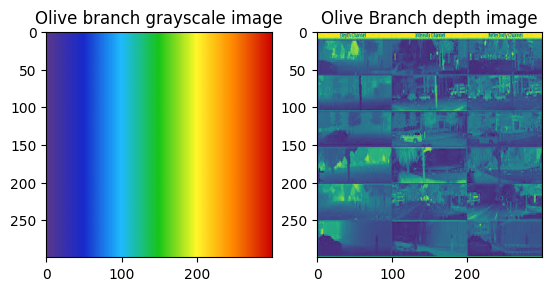

In [47]:
##Now we can render the transformed pjotos and Numpy array with Matplotlib
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("Olive branch grayscale image")
plt.imshow(rgbd_image.color)
plt.subplot(1,2,2)
plt.title('Olive Branch depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [52]:
##depth_8
depth_8=(np.array(depth_image_o3d)/255).astype('uint8')
#depth_raw_8
depth_raw_8=o3d.geometry.Image((depth_8).astype(np.uint8))
#rgbd Imahe
rgbd_image=o3d.geometry.RGBDImage.create_from_color_and_depth(raw_image_o3d,depth_raw_8)
depth_8
depth_raw_8
rgbd_image

RGBDImage of size 
Color image : 300x300, with 1 channels.
Depth image : 300x300, with 1 channels.
Use numpy.asarray to access buffer data.

In [59]:
import numpy as np


# First, check what's in the file
with open(txt_path, 'r') as f:
    first_lines = [f.readline().strip() for _ in range(5)]
    print("First few lines of the file:")
    for i, line in enumerate(first_lines):
        print(f"Line {i}: {line}")

# Load the data and check its shape
data = np.loadtxt(txt_path, skiprows=1,unpack=True)
print(f"\nLoaded data shape: {data.shape}")
print(f"Number of columns: {data.shape[1] if len(data.shape) > 1 else 1}")
print(f"First few rows:\n{data[:3]}")


First few lines of the file:
Line 0: 20.623 40.276 -1.999 -1031 127 141 154
Line 1: 20.362 40.375 -2.239 -941 130 141 159
Line 2: 20.36 40.376 -2.402 -1083 139 151 165
Line 3: 20.374 40.367 -2.405 -1122 131 147 163
Line 4: 20.372 40.366 -2.405 -1165 132 145 161

Loaded data shape: (7, 29697590)
Number of columns: 29697590
First few rows:
[[20.362 20.36  20.374 ... 60.122 60.088 60.197]
 [40.375 40.376 40.367 ... 81.777 81.818 82.137]
 [-2.239 -2.402 -2.405 ... 11.115 11.054 11.085]]


/tmp/ipython-input-2655657047.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x,y,z,s=0.001,c=colors/255)


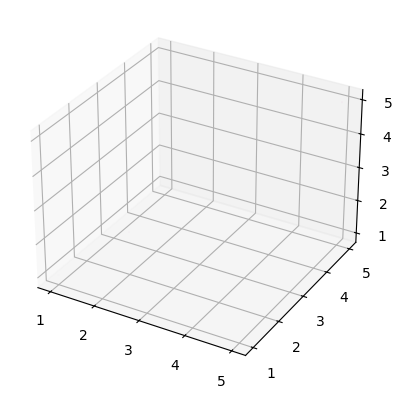

In [65]:

x = [1, 2, 3, 4, 5]  # Your actual x coordinates
y = [1, 2, 3, 4, 5]  # Your actual y coordinates
z = [1, 2, 3, 4, 5]  # Your actual z coordinates

# Then your existing code
r,g,b=[234,123,200]
colors=np.transpose(np.stack([r,g,b]))

def orthographic_projection(x,y,z):
  fig=plt.figure()
  ax=fig.add_subplot(111,projection='3d')
  ax.scatter(x,y,z,s=0.001,c=colors/255)
  plt.show()

orthographic_projection(x,y,z)

In [74]:
def plot_3d_scene(x,y,z,colors,camera_params):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111,projection='3d')
    ##Plot the point cloud
    # Check if colors needs conversion
    if not isinstance(colors, np.ndarray):
        colors = np.array(colors)
    ax.scatter(x,y,z,c=colors/255,s=0.005)
    ##Plot the camera position
    camera_position=np.array(camera_params['position'])
    ax.scatter(camera_position[0],camera_position[1],camera_position[2],c='r',marker='x',s=100,label='Camera')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D scene with point Cloud and Camera Position')
    ax.legend()
    plt.show()


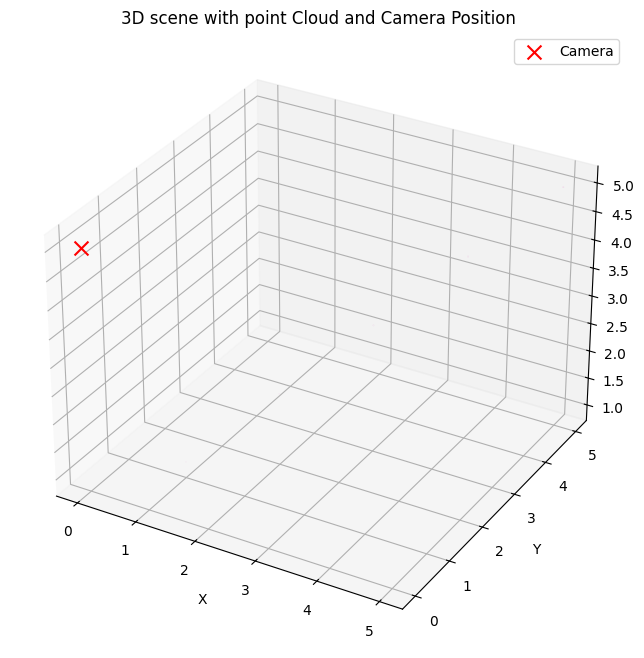

In [75]:

x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
z = [1, 2, 3, 4, 5]
colors = [[234, 123, 200]] * 5

# Then call the function
plot_3d_scene(x, y, z, colors, camera_params)

/tmp/ipython-input-930858045.py:72: RuntimeWarning: divide by zero encountered in divide
  projected_x = focal_length * transformation_points[0] / transformation_points[2]
/tmp/ipython-input-930858045.py:73: RuntimeWarning: divide by zero encountered in divide
  projected_y = focal_length * transformation_points[1] / transformation_points[2]


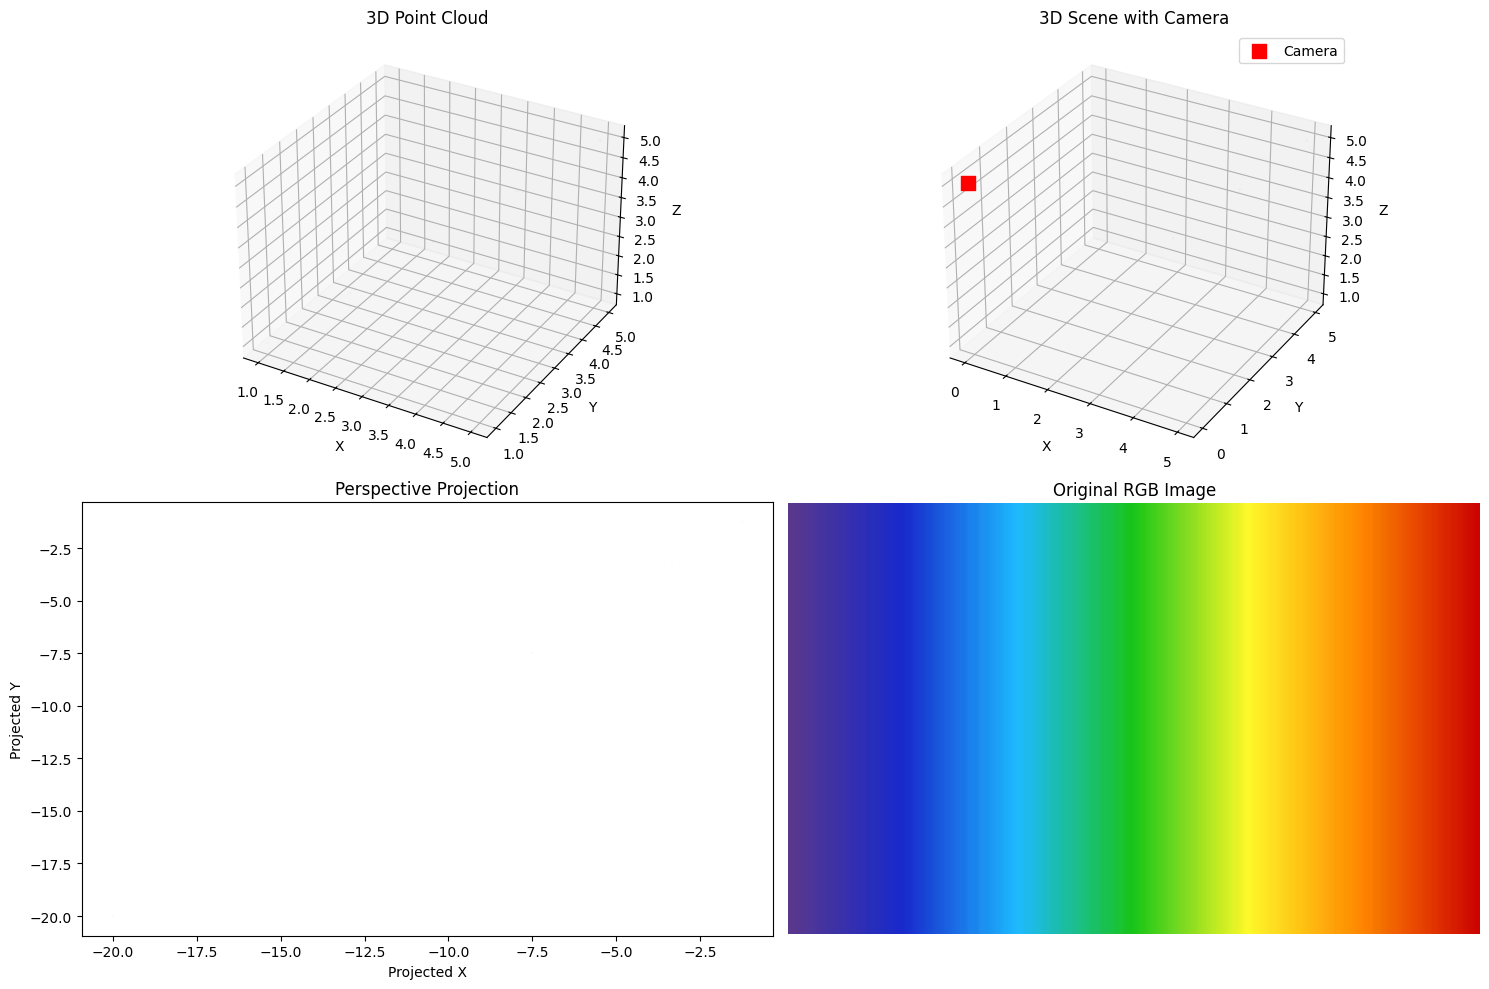

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot_3d_scene(x,y,z,colors,camera_params):
    fig = plt.figure(figsize=(15,10))

    colors_array = np.array(colors)/255.0

    ax1 = fig.add_subplot(221, projection='3d')
    ax1.scatter(x,y,z,c=colors_array,s=0.005)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D Point Cloud')

    ax2 = fig.add_subplot(222, projection='3d')
    ax2.scatter(x,y,z,c=colors_array,s=0.005)
    camera_position = np.array(camera_params['position'])
    ax2.scatter(camera_position[0], camera_position[1], camera_position[2],
                c='r', marker='s', s=100, label='Camera')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title('3D Scene with Camera')
    ax2.legend()

    projected_x, projected_y = perspective_projection_3d_calc(x,y,z,colors_array,camera_params)

    ax3 = fig.add_subplot(223)
    ax3.scatter(projected_x, projected_y, s=0.001, c=colors_array)
    ax3.set_xlabel('Projected X')
    ax3.set_ylabel('Projected Y')
    ax3.set_title('Perspective Projection')
    ax3.grid(False)

    ax4 = fig.add_subplot(224)
    img = Image.open('/content/drive/MyDrive/sample_dataset/rgb_point_cloud.jpg')
    ax4.imshow(img)
    ax4.set_title('Original RGB Image')
    ax4.axis('off')

    plt.tight_layout()
    plt.show()

def perspective_projection_3d_calc(x,y,z,colors_array,camera_params):
    focal_length = camera_params['focal_length']
    camera_position = camera_params['position']
    camera_orientation = camera_params['orientation']

    roll, pitch, yaw = camera_orientation

    Rx = np.array([[1,0,0],[0,np.cos(roll),-np.sin(roll)],[0,np.sin(roll),np.cos(roll)]])
    Ry = np.array([[np.cos(pitch),0,np.sin(pitch)],[0,1,0],[-np.sin(pitch),0,np.cos(pitch)]])
    Rz = np.array([[np.cos(yaw),-np.sin(yaw),0],[np.sin(yaw),np.cos(yaw),0],[0,0,1]])

    rotation_matrix_3x3 = Rz @ Ry @ Rx
    rotation_matrix = np.eye(4)
    rotation_matrix[:3,:3] = rotation_matrix_3x3

    translation_matrix = np.array([
        [1,0,0,-camera_position[0]],
        [0,1,0,-camera_position[1]],
        [0,0,1,-camera_position[2]],
        [0,0,0,1]
    ])

    transformation_matrix = np.dot(translation_matrix, rotation_matrix)
    points_3d = np.stack((x,y,z,np.ones_like(x)))
    transformation_points = np.dot(transformation_matrix, points_3d)

    projected_x = focal_length * transformation_points[0] / transformation_points[2]
    projected_y = focal_length * transformation_points[1] / transformation_points[2]

    return projected_x, projected_y

camera_params = {
    'focal_length': 5,
    'position': [0, 0, 5],
    'orientation': (0, 0, 0)
}

plot_3d_scene(x, y, z, colors, camera_params)

In [5]:
##For experiments with voxels we can use Open3D which has a lodare for voxel objects
import open3d as o3d
voxels_path='/content/drive/MyDrive/Point_cloud_data/point_cloud_ply/PLY(postshot)/cactus_splat3_25kSteps_2M_splats.ply'
vox_read=o3d.io.read_voxel_grid(voxels_path)


[Open3D WARNING] Read PLY failed: unable to open file: /content/drive/MyDrive/Point_cloud_data/point_cloud_ply/PLY(postshot)/cactus_splat3_25kSteps_2M_splats.ply


In [3]:
##High Level 3D represtation
import network as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:
!pip install network

  Preparing metadata (setup.py) ... done
  Created wheel for network: filename=network-0.1-py3-none-any.whl size=3138 sha256=99d1bdfb4da5a31c072552c9841b2a7535a17b7789415e1ba1c2fceae3e41793
  Stored in directory: /root/.cache/pip/wheels/e7/5a/7a/7f15bea66afb5505b9d10cc7bd8964cb77f0ce736df5b104c8
Successfully built network


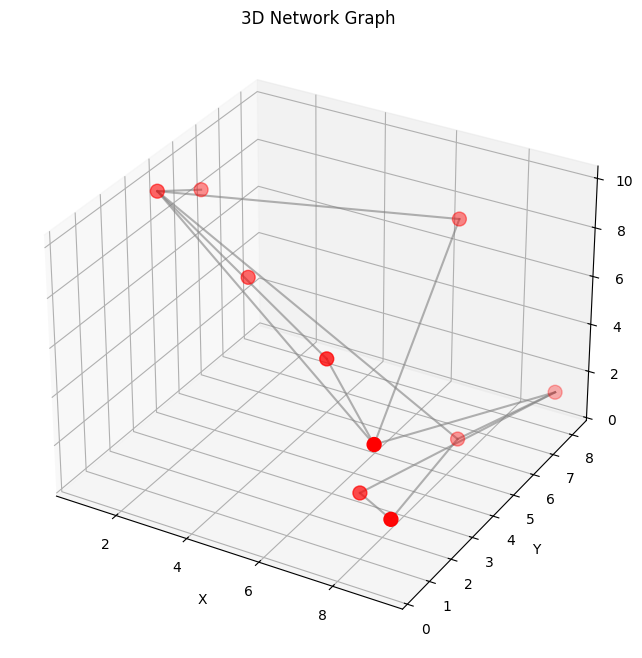

In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def create_3d_graph():
    # Create a random graph
    G = nx.erdos_renyi_graph(10, 0.3)

    # Generate 3D positions
    pos = {
        node: (np.random.uniform(0, 10),
               np.random.uniform(0, 10),
               np.random.uniform(0, 10))
        for node in G.nodes()
    }

    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Draw edges
    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [pos[edge[0]][2], pos[edge[1]][2]]
        ax.plot(x, y, z, color='gray', alpha=0.6)

    # Draw nodes
    xs, ys, zs = zip(*[pos[node] for node in G.nodes()])
    ax.scatter(xs, ys, zs, c='red', s=100)
    ax.set_title('3D Network Graph')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

create_3d_graph()

In [27]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [17]:

#import open3d libbabry
import open3d as o3d
##Read the traingle mesh from a ply file
mesh_path='/content/drive/MyDrive/Point_cloud_data/point_cloud_ply/PLY(postshot)/cactus_splat3_25kSteps_2M_splats.ply'
mesh=o3d.io.read_triangle_mesh(mesh_path)
##computer vertex normals for the mesh,This step is essential for
##lighting calculations and visalization
mesh.compute_vertex_normals()
##Vislize the mesh using open3d built in visualization tool
##The draw geometrry function takes a list of geometry objects as input and
##displays them
o3d.visualization.draw_geometries([mesh])

[Open3D WARNING] geometry::TriangleMesh appears to be a geometry::PointCloud (only contains vertices, but no triangles).
[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [25]:
## Define the vertices of the cube
import numpy as np
size = 1.0
vertices = size / 2 * np.array([
[-1, -1, -1],
[1, -1, -1],
[1, 1, -1],
[-1, 1, -1],
[-1, -1, 1],
[1, -1, 1],
[1, 1, 1],
[-1, 1, 1],
])

# Define the triangles (faces) of the
# cube using vertex indices
triangles = np.array([
[0, 1, 2], [0, 2, 3],
[4, 5, 6], [4, 6, 7],
[0, 4, 5], [0, 5, 1],
[2, 6, 7], [2, 7, 3],
[0, 4, 7], [0, 7, 3],
[1, 5, 6], [1, 6, 2],
])
##triangle mesh object using vertices and triangles
mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(vertices)
mesh.triangles = o3d.utility.Vector3iVector(triangles)
print(f"Mesh:{mesh}")
print(f"Mesh-Vertics:{mesh.vertices}")
print(f"Mesh-traingles:{mesh.triangles }")

Mesh:TriangleMesh with 8 points and 12 triangles.
Mesh-Vertics:std::vector<Eigen::Vector3d> with 8 elements.
Use numpy.asarray() to access data.
Mesh-traingles:std::vector<Eigen::Vector3i> with 12 elements.
Use numpy.asarray() to access data.


In [26]:
mesh.compute_vertex_normals()

TriangleMesh with 8 points and 12 triangles.

In [27]:
# Visualize the cube

def create_parametric_cube(size):
    vertices = size / 2 * np.array([
        [-1, -1, -1],
        [1, -1, -1],
        [1, 1, -1],
        [-1, 1, -1],
        [-1, -1, 1],
        [1, -1, 1],
        [1, 1, 1],
        [-1, 1, 1],
    ])

    triangles = np.array([
        [0, 1, 2], [0, 2, 3],
        [4, 5, 6], [4, 6, 7],
        [0, 4, 5], [0, 5, 1],
        [2, 6, 7], [2, 7, 3],
        [0, 4, 7], [0, 7, 3],
        [1, 5, 6], [1, 6, 2],
    ])

    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(vertices)
    mesh.triangles = o3d.utility.Vector3iVector(triangles)
    return mesh

cube1 = create_parametric_cube(1.0)
cube1.paint_uniform_color([1, 0, 0])
cube1.translate([-2, 0, 0])

cube2 = create_parametric_cube(2.0)
cube2.paint_uniform_color([0, 1, 0])
cube2.translate([2, 0, 0])

o3d.visualization.draw_geometries([cube1, cube2])

[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


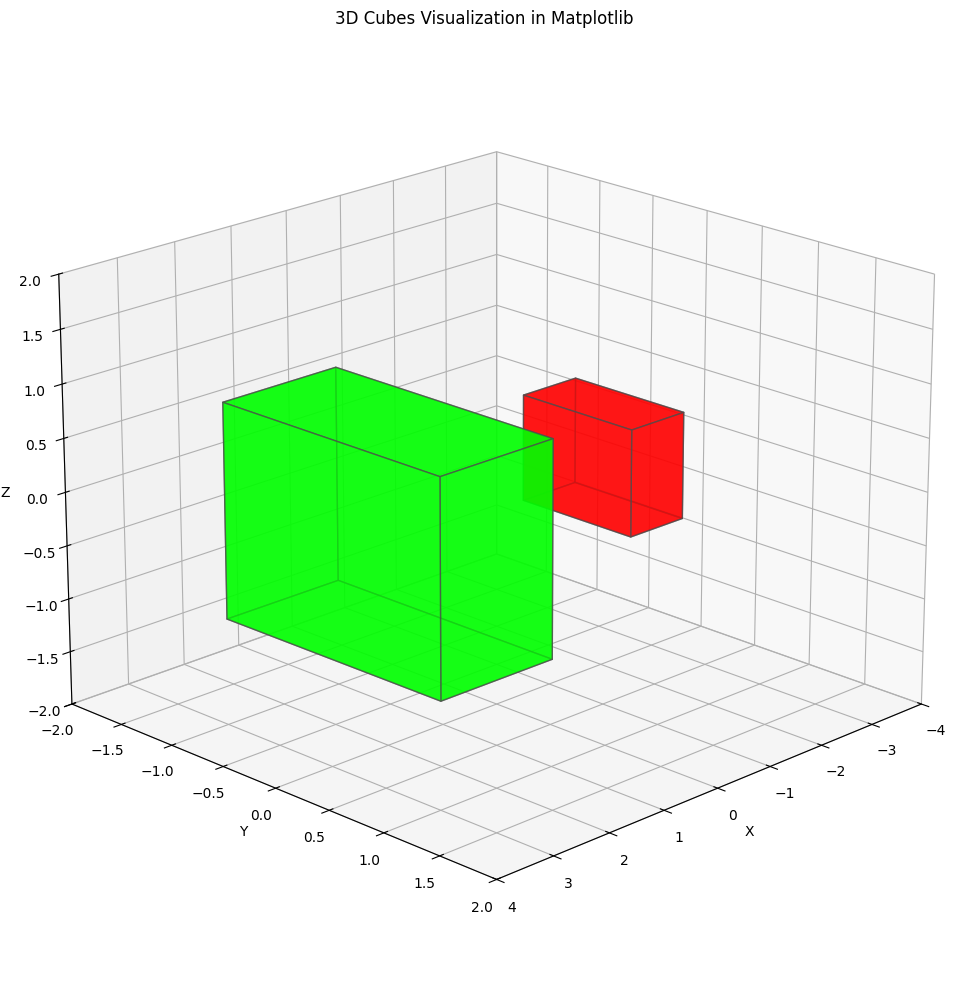

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_parametric_cube(size, color):
    vertices = size / 2 * np.array([
        [-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1],
        [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1],
    ])

    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[0], vertices[3], vertices[7], vertices[4]],
        [vertices[1], vertices[2], vertices[6], vertices[5]]
    ]

    return faces, color

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

cube1_faces, cube1_color = create_parametric_cube(1.0, [1, 0, 0, 0.7])
cube2_faces, cube2_color = create_parametric_cube(2.0, [0, 1, 0, 0.7])

for face in cube1_faces:
    face = np.array(face) + [-2, 0, 0]
    poly = Poly3DCollection([face], alpha=0.7)
    poly.set_facecolor(cube1_color)
    poly.set_edgecolor([0.3, 0.3, 0.3])
    ax.add_collection3d(poly)

for face in cube2_faces:
    face = np.array(face) + [2, 0, 0]
    poly = Poly3DCollection([face], alpha=0.7)
    poly.set_facecolor(cube2_color)
    poly.set_edgecolor([0.3, 0.3, 0.3])
    ax.add_collection3d(poly)

ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Cubes Visualization in Matplotlib')

ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()

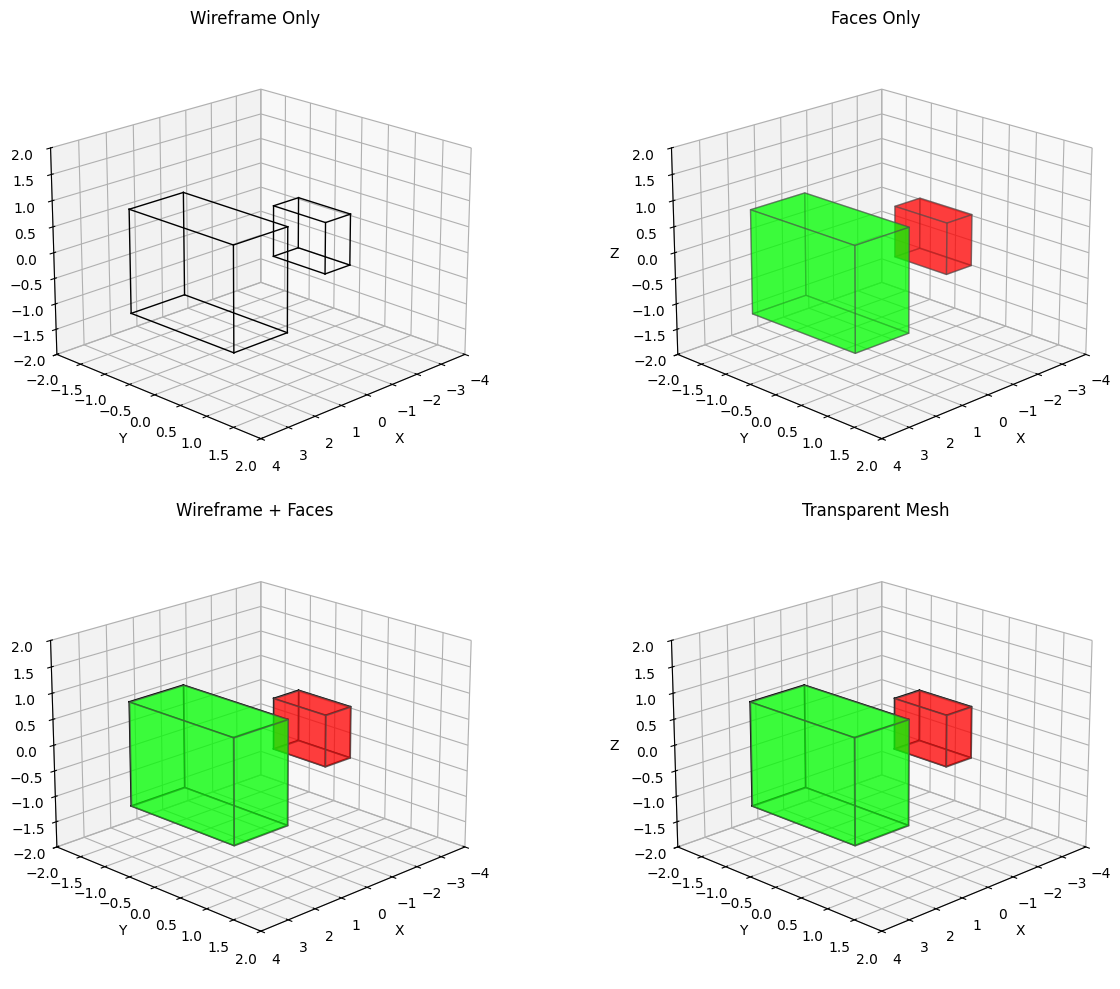

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def create_parametric_cube(size, color):
    vertices = size / 2 * np.array([
        [-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1],
        [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1],
    ])

    edges = [
        [vertices[0], vertices[1]], [vertices[1], vertices[2]], [vertices[2], vertices[3]], [vertices[3], vertices[0]],
        [vertices[4], vertices[5]], [vertices[5], vertices[6]], [vertices[6], vertices[7]], [vertices[7], vertices[4]],
        [vertices[0], vertices[4]], [vertices[1], vertices[5]], [vertices[2], vertices[6]], [vertices[3], vertices[7]]
    ]

    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[0], vertices[3], vertices[7], vertices[4]],
        [vertices[1], vertices[2], vertices[6], vertices[5]]
    ]

    return vertices, edges, faces, color

fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

cube1_verts, cube1_edges, cube1_faces, cube1_color = create_parametric_cube(1.0, [1, 0, 0, 0.3])
cube2_verts, cube2_edges, cube2_faces, cube2_color = create_parametric_cube(2.0, [0, 1, 0, 0.3])

for ax, title, show_faces, show_edges in [(ax1, 'Wireframe Only', False, True),
                                          (ax2, 'Faces Only', True, False),
                                          (ax3, 'Wireframe + Faces', True, True),
                                          (ax4, 'Transparent Mesh', True, True)]:

    for face in cube1_faces:
        face = np.array(face) + [-2, 0, 0]
        if show_faces:
            poly = Poly3DCollection([face], alpha=0.5)
            poly.set_facecolor(cube1_color)
            poly.set_edgecolor([0.3, 0.3, 0.3])
            ax.add_collection3d(poly)

    for face in cube2_faces:
        face = np.array(face) + [2, 0, 0]
        if show_faces:
            poly = Poly3DCollection([face], alpha=0.5)
            poly.set_facecolor(cube2_color)
            poly.set_edgecolor([0.3, 0.3, 0.3])
            ax.add_collection3d(poly)

    if show_edges:
        for edge in cube1_edges:
            edge = np.array(edge) + [-2, 0, 0]
            ax.plot(edge[:, 0], edge[:, 1], edge[:, 2], 'k-', linewidth=1)

        for edge in cube2_edges:
            edge = np.array(edge) + [2, 0, 0]
            ax.plot(edge[:, 0], edge[:, 1], edge[:, 2], 'k-', linewidth=1)

    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

In [42]:
##Mesh to Point Cloud
bunny=o3d.data.BunnyMesh()

[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/BunnyMesh.ply
[Open3D INFO] Downloaded to /root/open3d_data/download/BunnyMesh/BunnyMesh.ply


In [44]:
mesh=o3d.io.read_triangle_mesh(bunny.path)
mesh

TriangleMesh with 35947 points and 69451 triangles.

In [45]:
#Visualize
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [53]:
pcd = mesh.sample_points_uniformly(number_of_points=1000)
o3d.visualization.draw_geometries([pcd])

save_path = '/content/drive/MyDrive/Point_cloud_data/custom_point_cloud.ply'
success = o3d.io.write_point_cloud(save_path, pcd)

if success:
    print('Point cloud saved successfully!')
else:
    print('Failed to save point cloud')

[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
Point cloud saved successfully!


In [58]:
##Voexel to point cloud
#turn a voxel entity into a 3D point cloud
voxels_dataset = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, voxel_size=0.05)
pcd_vox_np=np.asarray([voxels_dataset.origin+pt.grid_index*voxels_dataset.voxel_size for pt in voxels_dataset.get_voxels()])
pcd_vox_np

array([[-0.11953931,  0.00843768, -0.03659522],
       [-0.01953931,  0.10843768,  0.01340478],
       [-0.06953931,  0.05843768, -0.03659522],
       [-0.06953931,  0.00843768,  0.01340478],
       [-0.11953931,  0.15843768, -0.08659522],
       [-0.11953931,  0.10843768, -0.08659522],
       [ 0.03046069,  0.05843768,  0.01340478],
       [-0.06953931,  0.05843768,  0.01340478],
       [ 0.03046069,  0.05843768, -0.03659522],
       [-0.11953931,  0.10843768, -0.03659522],
       [-0.01953931,  0.10843768, -0.03659522],
       [-0.01953931,  0.05843768, -0.08659522],
       [-0.01953931,  0.00843768, -0.03659522],
       [-0.11953931,  0.15843768, -0.03659522],
       [-0.06953931,  0.10843768, -0.03659522],
       [-0.11953931,  0.10843768,  0.01340478],
       [-0.11953931,  0.05843768,  0.01340478],
       [-0.01953931,  0.05843768, -0.03659522],
       [ 0.03046069,  0.00843768,  0.01340478],
       [-0.01953931,  0.15843768, -0.03659522],
       [-0.01953931,  0.00843768,  0.013

In [59]:
##Open3D object and get the visualization
pcd_vox_o3d=o3d.geometry.PointCloud()
pcd_vox_o3d.points=o3d.utility.Vector3dVector(pcd_vox_np)
o3d.visualization.draw_geometries([pcd_vox_o3d])

[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


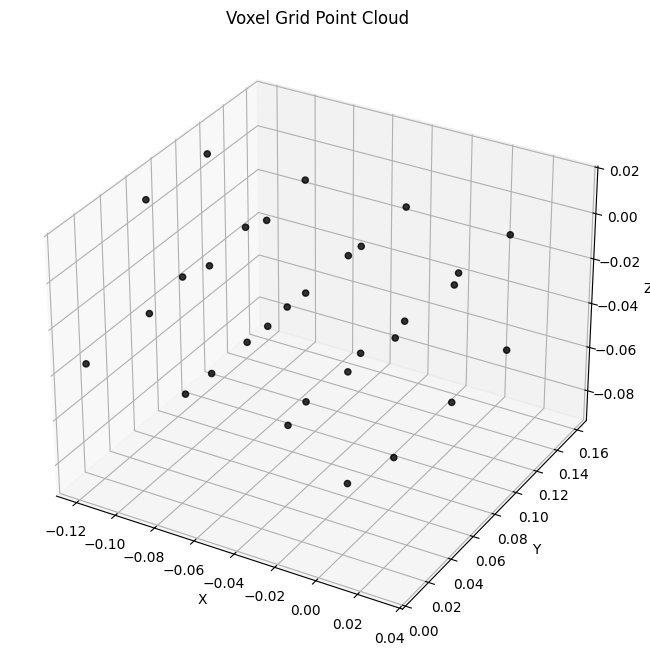

In [61]:
##color_inputs
# Create point cloud from voxels
pcd_vox_np = np.asarray([voxels_dataset.origin + pt.grid_index * voxels_dataset.voxel_size for pt in voxels_dataset.get_voxels()])
color_voxels = np.array([v.color for v in voxels_dataset.get_voxels()])

# Create Open3D point cloud
pcd_vox_o3d = o3d.geometry.PointCloud()
pcd_vox_o3d.points = o3d.utility.Vector3dVector(pcd_vox_np)
pcd_vox_o3d.colors = o3d.utility.Vector3dVector(color_voxels)

# Visualize with matplotlib (for Colab)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

points = np.asarray(pcd_vox_o3d.points)
colors = np.asarray(pcd_vox_o3d.colors)

ax.scatter(points[:, 0], points[:, 1], points[:, 2],
           c=colors, s=20, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Voxel Grid Point Cloud')
plt.show()

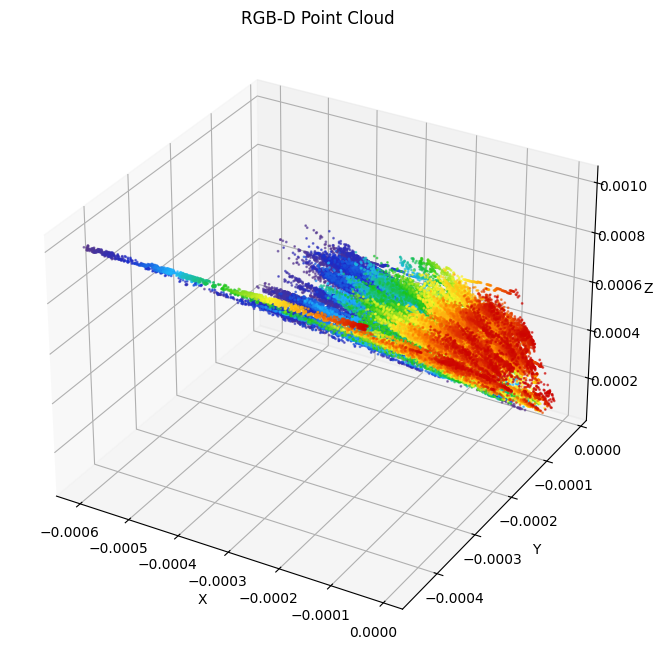

In [67]:
#Raster to Point cloud
'''
perspective projection,
orthographic projection
and spherical projection
'''
import open3d as o3d
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paths
raw_image_path = '/content/drive/MyDrive/sample_dataset/rgb_point_cloud.jpg'
depth_image_path = '/content/drive/MyDrive/sample_dataset/depth_image.jpg'

# Read images with OpenCV and resize to same dimensions
color_np = cv2.imread(raw_image_path)
depth_np = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)

# Convert BGR to RGB
color_np = cv2.cvtColor(color_np, cv2.COLOR_BGR2RGB)

# Resize depth to match color dimensions
depth_resized = cv2.resize(depth_np, (color_np.shape[1], color_np.shape[0]),
                          interpolation=cv2.INTER_NEAREST)

# Convert to Open3D images
color_o3d = o3d.geometry.Image(color_np)
depth_o3d = o3d.geometry.Image(depth_resized)

# Create RGBD image
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_o3d,
    depth_o3d,
    depth_scale=1000.0,  # Adjust based on your depth values
    depth_trunc=3.0,     # Adjust based on your scene
    convert_rgb_to_intensity=False
)

# Create point cloud
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault
    )
)

# Visualize with matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

points = np.asarray(pcd.points)
if pcd.has_colors():
    colors = np.asarray(pcd.colors)
else:
    colors = 'blue'

ax.scatter(points[:, 0], points[:, 1], points[:, 2],
           c=colors, s=1, alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('RGB-D Point Cloud')
plt.show()

In [ ]:
##Orthographic projection
